#  Modelo THDM-III en la base del Higgs

Sample of notebook for specific model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
import hep as hp
import scipy as sc

In [3]:
import numpy.lib.scimath as sc

In [4]:
a=hp.hep(MODEL='THDMIIIHB')

In [5]:
pd.Series(a.LHA.blocks['MINPAR'].entries)

1    1.3000000E-01   # lambda1Input
2    0.0000000E+00   # lambda2Input
3    0.0000000E+00   # lambda3Input
4    0.0000000E+00   # lambda4Input
5    -1.0000000E-05  # lambda5Input
6    0.000000E+00    # lambda6Input
7    0.000000E+00    # lambda7Input
8       1.0000000E+02   # mEt2Input
dtype: object

In [6]:
def Phys_to_Gen(Mh, MH, MA, MHp, M122, Y133, Y233, v, lam6, lam7):
    MHp2 = MHp*MHp; MA2 = MA*MA; v2 = v*v; MH2 = MH*MH; Mh2 = Mh*Mh;
    Beta = np.arctan2(-Y233,Y133); Alpha = Beta-1.5;
    ca = np.cos(Alpha); sa = np.sin(Alpha); ca2 = ca*ca; sa2 = sa*sa;
    tb = np.tan(Beta); cb = np.cos(Beta); sb = np.sin(Beta);
    tb3 = tb*tb*tb; sb2 = sb*sb; cb2 = cb*cb;
    cba = np.cos(Beta-Alpha); sba = np.sin(Beta-Alpha);
    
    lam1 = (MH2*ca2+Mh2*sa2-M122*tb)/(v2*cb2)-1.5*lam6*tb+0.5*lam7*tb3
    lam2 = (MH2*sa2+Mh2*ca2-M122/tb)/(v2*sb2)+0.5*lam6/tb3-1.5*lam7/tb
    lam3 = ((MH2-Mh2)*ca*sa+2.0*MHp2*sb*cb-M122)/(v2*sb*cb)-0.5*(lam6/tb+lam7*tb)
    lam4 = ((MA2-2.0*MHp2)*sb*cb+M122)/(v2*sb*cb) -0.5*(lam6/tb+lam7*tb)
    lam5 = (M122-MA2*sb*cb)/(v2*sb*cb) -0.5*(lam6/tb+lam7*tb)
    m112 = -(MH2*ca*cba-Mh2*sa*sba)/(2.0*cb)+M122*tb
    m222 = -(Mh2*ca*sba+MH2*sa*cba)/(2.0*sb)+M122/tb
    
    return lam1, lam2, lam3, lam4, lam5, m112, m222 

def Gen_to_Higgs(lam1, lam2, lam3, lam4, lam5, lam6, lam7, m122, Y133, Y233, m112):
    Beta = np.arctan2(-Y233,Y133); Alpha = Beta-1.5;
    ca = np.cos(Alpha); sa = np.sin(Alpha); ca2 = ca*ca; sa2 = sa*sa;
    tb = np.tan(Beta); cb = np.cos(Beta); sb = np.sin(Beta);
    tb3 = tb*tb*tb; sb2 = sb*sb; cb2 = cb*cb;
    c2b = np.cos(2.0*Beta); s2b = np.sin(2.0*Beta);
    c3b = np.cos(2.0*Beta); s3b = np.sin(3.0*Beta);
    cba = np.cos(Beta-Alpha); sba = np.sin(Beta-Alpha);
    lam345 = lam3+lam4+lam5
    
    m112 = m122*tb-0.5*v2*(lam1*cb2+(lam3+lam4+lam5)*sb2+3.*lam6*sb*cb+lam7*sb2*tb)
    m222 = m122/tb-0.5*v2*(lam2*sb2+(lam3+lam4+lam5)*cb2+lam6*cb2/tb+3.*lam7*sb*cb)
    M222 = m112*sb2+m222*cb2+m122*s2b
    Lam1 = lam1*cb2*cb2+lam2*sb2*sb2+0.5*lam345*s2b*s2b+2.0*s2b*(cb2*lam6+sb2*lam7)
    Lam2 = lam1*sb2*sb2+lam2*cb2*cb2+0.5*lam345*s2b*s2b-2.0*s2b*(sb2*lam6+cb2*lam7)
    Lam3 = 0.25*s2b*s2b*(lam1+lam2-2.0*lam345)+lam3-s2b*c2b*(lam6-lam7)
    Lam4 = 0.25*s2b*s2b*(lam1+lam2-2.0*lam345)+lam4-s2b*c2b*(lam6-lam7)
    Lam5 = 0.25*s2b*s2b*(lam1+lam2-2.0*lam345)+lam5-s2b*c2b*(lam6-lam7)
    Lam6 = -0.5*s2b*(lam1*cb2-lam2*sb2-lam345*c2b)+cb*c3b*lam6+sb*s3b*lam7
    Lam7 = -0.5*s2b*(lam1*sb2-lam2*cb2-lam345*c2b)+sb*s3b*lam6+cb*c3b*lam7
    
    return M222, Lam1, Lam2, Lam3, Lam4, Lam5, Lam6, Lam7 

def Phys_to_Higgs(Mh, MH, MA, MHp, m122, Y133, Y233, v, lam6, lam7):
    lam1, lam2, lam3, lam4, lam5, m112, m222 = Phys_to_Gen(Mh, MH, MA, MHp, m122, Y133, Y233, v, lam6, lam7)
    M222, Lam1, Lam2, Lam3, Lam4, Lam5, Lam6, Lam7 = Gen_to_Higgs(lam1, lam2, lam3, lam4, lam5, lam6, lam7, m122, Y133, Y233, m112)    
    return M222, Lam1, Lam2, Lam3, Lam4, Lam5, Lam6, Lam7 

In [7]:
v = 246.2
v2 = v*v
m122 = 40000.0
MHp = 350.0
MA = MHp+5.
Mh = 125.0
MH = MHp+10.

lam6 = 0.0000000E-01
lam7 = 1.0000000E-02

Y133 = 0.0240086062
Y233 = -Y133
epsD33 = Y233

M222, Lam1, Lam2, Lam3, Lam4, Lam5, Lam6, Lam7 = Phys_to_Higgs(Mh, MH, MA, MHp, m122, Y133, Y233, v, lam6, lam7)
print M222, Lam1, Lam2, Lam3, Lam4, Lam5, Lam6, Lam7

71902.34870000894 0.2671855518253095 0.2471855518253095 1.6694916689815518 0.1658795725905884 0.04957065346174716 -0.13267591780624702 -0.1376759178062468


In [8]:
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][1]='%0.8E       #lambda1Input' %Lam1
a.LHA.blocks['MINPAR'][2]='%0.8E       #lambda2Input' %Lam2
a.LHA.blocks['MINPAR'][3]='%0.8E       #lambda3Input' %Lam3
a.LHA.blocks['MINPAR'][4]='%0.8E       #lambda4Input' %Lam4
a.LHA.blocks['MINPAR'][5]='%0.8E       #lambda5Input' %Lam5
a.LHA.blocks['MINPAR'][6]='%0.8E       #lambda6Input' %Lam6
a.LHA.blocks['MINPAR'][7]='%0.8E       #lambda7Input' %Lam7
a.LHA.blocks['MINPAR'][8]='%0.8E      #mEt2Input'    %M222


In [9]:
Q = np.zeros((3,3))

In [10]:
epsE11 = Q[0,0]          # epsE(1,1)
epsE12 = Q[0,1]          # epsE(1,2)
epsE13 = Q[0,2]          # epsE(1,3)
epsE21 = Q[1,0]          # epsE(2,1)
epsE22 = Q[1,1]          # epsE(2,2)
epsE23 = Q[1,2]          # epsE(2,3)
epsE31 = Q[2,0]          # epsE(3,1)
epsE32 = Q[2,1]          # epsE(3,2)
epsE33 = Q[2,2]          # epsE(3,3)

a.LHA.blocks['EPSDIN'][(1,1)]='%0.8E      # epsD(1,1)'    %epsE11
a.LHA.blocks['EPSDIN'][(1,2)]='%0.8E      # epsD(1,2)'    %epsE12
a.LHA.blocks['EPSDIN'][(1,3)]='%0.8E      # epsD(1,3)'    %epsE13
a.LHA.blocks['EPSDIN'][(2,1)]='%0.8E      # epsD(2,1)'    %epsE21
a.LHA.blocks['EPSDIN'][(2,2)]='%0.8E      # epsD(2,2)'    %epsE22
a.LHA.blocks['EPSDIN'][(2,3)]='%0.8E      # epsD(2,3)'    %epsE23
a.LHA.blocks['EPSDIN'][(3,1)]='%0.8E      # epsD(3,1)'    %epsE31
a.LHA.blocks['EPSDIN'][(3,2)]='%0.8E      # epsD(3,2)'    %epsE32
a.LHA.blocks['EPSDIN'][(3,3)]='%0.8E      # epsD(3,3)'    %epsD33

a.LHA.blocks['EPSUIN'][(1,1)]='%0.8E      # epsU(1,1)'    %epsE11
a.LHA.blocks['EPSUIN'][(1,2)]='%0.8E      # epsU(1,2)'    %epsE12
a.LHA.blocks['EPSUIN'][(1,3)]='%0.8E      # epsU(1,3)'    %epsE13
a.LHA.blocks['EPSUIN'][(2,1)]='%0.8E      # epsU(2,1)'    %epsE21
a.LHA.blocks['EPSUIN'][(2,2)]='%0.8E      # epsU(2,2)'    %epsE22
a.LHA.blocks['EPSUIN'][(2,3)]='%0.8E      # epsU(2,3)'    %epsE23
a.LHA.blocks['EPSUIN'][(3,1)]='%0.8E      # epsU(3,1)'    %epsE31
a.LHA.blocks['EPSUIN'][(3,2)]='%0.8E      # epsU(3,2)'    %epsE32
a.LHA.blocks['EPSUIN'][(3,3)]='%0.8E      # epsU(3,3)'    %epsE33

a.LHA.blocks['EPSEIN'][(1,1)]='%0.8E      # epsE(1,1)'    %epsE11
a.LHA.blocks['EPSEIN'][(1,2)]='%0.8E      # epsE(1,2)'    %epsE12
a.LHA.blocks['EPSEIN'][(1,3)]='%0.8E      # epsE(1,3)'    %epsE13
a.LHA.blocks['EPSEIN'][(2,1)]='%0.8E      # epsE(2,1)'    %epsE21
a.LHA.blocks['EPSEIN'][(2,2)]='%0.8E      # epsE(2,2)'    %epsE22
a.LHA.blocks['EPSEIN'][(2,3)]='%0.8E      # epsE(2,3)'    %epsE23
a.LHA.blocks['EPSEIN'][(3,1)]='%0.8E      # epsE(3,1)'    %epsE31
a.LHA.blocks['EPSEIN'][(3,2)]='%0.8E      # epsE(3,2)'    %epsE32
a.LHA.blocks['EPSEIN'][(3,3)]='%0.8E      # epsE(3,3)'    %epsE33

moc=a.runSPheno()

In [11]:
a.LHA_out_with_comments.blocks["MASS"].entries

_dict([(25, '1.25010203E+02  # hh_1'),
       (35, '3.60013474E+02  # hh_2'),
       (36, '3.55012738E+02  # etI'),
       (37, '3.50012078E+02  # etp'),
       (23, '9.11887000E+01  # VZ'),
       (24, '8.03497269E+01  # VWp'),
       (1, '5.00000000E-03  # Fd_1'),
       (3, '9.50000000E-02  # Fd_2'),
       (5, '4.18000000E+00  # Fd_3'),
       (2, '2.50000000E-03  # Fu_1'),
       (4, '1.27000000E+00  # Fu_2'),
       (6, '1.73500000E+02  # Fu_3'),
       (11, '5.10998930E-04  # Fe_1'),
       (13, '1.05658372E-01  # Fe_2'),
       (15, '1.77669000E+00  # Fe_3')])

In [32]:
a.LHA_out_with_comments.blocks['FLAVORKITQFV'][200]

'3.37697963E-04  # BR(B->X_s gamma)'

In [17]:
B_XsGM = 3.55e-4

N = 10000

Sol = []

Yd33 = a.LHA_out.blocks['YD'][(3,3)]
Yu33 = a.LHA_out.blocks['YU'][(3,3)]
Ye33 = a.LHA_out.blocks['YE'][(3,3)]

for i in range(N):   
    TanD = np.random.uniform(-50.,50.)
    CotU = np.random.uniform(-4.,4.)
    
    epsD33 =-Yd33*TanD
    epsU33 = Yu33*1.0/CotU
    epsE33 =-Ye33*TanD
    
    a.LHA.blocks['EPSDIN'][(3,3)]='%0.8E      # epsD(3,3)'    %epsD33
    a.LHA.blocks['EPSUIN'][(3,3)]='%0.8E      # epsU(3,3)'    %epsU33
    a.LHA.blocks['EPSEIN'][(3,3)]='%0.8E      # epsE(3,3)'    %epsE33

    moc=a.runSPheno() 

    B_XsG = a.LHA_out.blocks['FLAVORKITQFV'][200]
    
    if (B_XsG <= B_XsGM+(3.0*0.27e-4) and B_XsG >= B_XsGM-(3.0*0.27e-4)):    
        Sol.append([TanD, CotU])
    
len(Sol)

268

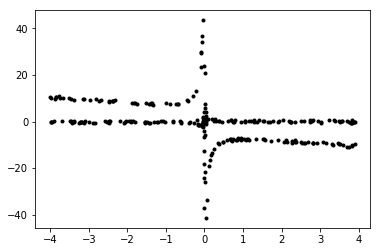

In [18]:
Sol = np.matrix(Sol)

plt.plot(Sol[:,1], Sol[:,0], ".k")

In [ ]:
B_XsGM = 3.55e-4

N = 1000

Sol = []

Yd33 = a.LHA_out.blocks['YD'][(3,3)]
Yu33 = a.LHA_out.blocks['YU'][(3,3)]
Ye33 = a.LHA_out.blocks['YE'][(3,3)]

for i in range(N):   
    TanD = np.random.uniform(-50.,50.)
    CotU = np.random.uniform(-4.,4.)
    
    epsD33 =-Yd33*TanD
    epsU33 = Yu33*1.0/CotU
    epsE33 =-Ye33*(-CotU)
    
    a.LHA.blocks['EPSDIN'][(3,3)]='%0.8E      # epsD(3,3)'    %epsD33
    a.LHA.blocks['EPSUIN'][(3,3)]='%0.8E      # epsU(3,3)'    %epsU33
    a.LHA.blocks['EPSEIN'][(3,3)]='%0.8E      # epsE(3,3)'    %epsE33

    moc=a.runSPheno() 

    B_XsG = a.LHA_out.blocks['FLAVORKITQFV'][200]
    
    if (B_XsG < B_XsGM+0.27e-4 and B_XsG > B_XsGM-0.27e-4):    
        Sol.append([TanD, CotU])
    
len(Sol)

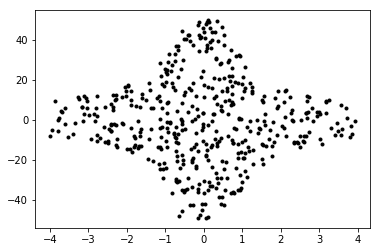

In [55]:
Sol = np.matrix(Sol)

plt.plot(Sol[:,1], Sol[:,0], ".k")

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)